# Document Similarity Detector - Analysis Notebook

This notebook demonstrates the implementation and analysis of various document similarity metrics used in Information Retrieval and Semantic Web applications.

## Topics Covered:
- **Vector Space Models** (TF-IDF)
- **Cosine Similarity**
- **Jaccard Index**
- **Latent Semantic Analysis (LSA)**
- **BERT Embeddings**
- **IR Evaluation Metrics** (Precision, Recall, F1-Score)
- **Embedding Visualization**

## 1. Import Required Libraries

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD
from transformers import AutoTokenizer, AutoModel
import torch
import re
from collections import Counter
from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('dark_background')
sns.set_palette("husl")

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


## 2. Sample Documents

Let's load our sample documents for analysis.

In [2]:
# Load sample documents
with open('sample_doc1.txt', 'r') as f:
    doc1 = f.read()

with open('sample_doc2.txt', 'r') as f:
    doc2 = f.read()

print("Document 1:")
print("-" * 80)
print(doc1)
print("\n" + "=" * 80 + "\n")
print("Document 2:")
print("-" * 80)
print(doc2)

Document 1:
--------------------------------------------------------------------------------
# Sample Document 1

This is a sample text document about artificial intelligence and machine learning.
Artificial intelligence has revolutionized many industries including healthcare, finance, and transportation.

Machine learning algorithms can analyze vast amounts of data and identify patterns that humans might miss.
Deep learning, a subset of machine learning, uses neural networks to process information in layers.

Natural language processing enables computers to understand and generate human language.
Computer vision allows machines to interpret and understand visual information from the world.

The future of AI includes advancements in robotics, autonomous systems, and personalized medicine.



Document 2:
--------------------------------------------------------------------------------
# Sample Document 2

This text discusses machine learning and artificial intelligence applications.
Mach

## 3. Text Preprocessing

Clean and preprocess the documents for analysis.

In [3]:
def preprocess_text(text):
    """Clean and preprocess text."""
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Preprocess documents
doc1_clean = preprocess_text(doc1)
doc2_clean = preprocess_text(doc2)

# Get word statistics
words1 = doc1_clean.split()
words2 = doc2_clean.split()

print(f"Document 1: {len(words1)} words, {len(set(words1))} unique words")
print(f"Document 2: {len(words2)} words, {len(set(words2))} unique words")
print(f"Common words: {len(set(words1).intersection(set(words2)))}")

Document 1: 94 words, 70 unique words
Document 2: 73 words, 62 unique words
Common words: 34


## 4. Similarity Metrics Implementation

### 4.1 Jaccard Index (Set-Based Similarity)

In [4]:
def jaccard_similarity(text1, text2):
    """Calculate Jaccard similarity coefficient."""
    words1 = set(preprocess_text(text1).split())
    words2 = set(preprocess_text(text2).split())
    
    intersection = words1.intersection(words2)
    union = words1.union(words2)
    
    jaccard = len(intersection) / len(union) if union else 0.0
    
    print(f"Set 1 size: {len(words1)}")
    print(f"Set 2 size: {len(words2)}")
    print(f"Intersection: {len(intersection)}")
    print(f"Union: {len(union)}")
    print(f"Jaccard Index: {jaccard:.4f}")
    
    return jaccard

jaccard_score = jaccard_similarity(doc1, doc2)

Set 1 size: 70
Set 2 size: 62
Intersection: 34
Union: 98
Jaccard Index: 0.3469


### 4.2 Cosine Similarity with TF-IDF Vectors

In [5]:
# Create TF-IDF vectors
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([doc1, doc2])

# Calculate cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]

print(f"TF-IDF Matrix Shape: {tfidf_matrix.shape}")
print(f"Vocabulary Size: {len(vectorizer.vocabulary_)}")
print(f"Cosine Similarity: {cosine_sim:.4f}")

# Get TF-IDF vectors for collapsible display
tfidf_doc1 = tfidf_matrix[0].toarray()[0]
tfidf_doc2 = tfidf_matrix[1].toarray()[0]

print(f"\nVector dimensions: {len(tfidf_doc1)}")
print(f"Non-zero elements in Doc1: {np.count_nonzero(tfidf_doc1)}")
print(f"Non-zero elements in Doc2: {np.count_nonzero(tfidf_doc2)}")

TF-IDF Matrix Shape: (2, 95)
Vocabulary Size: 95
Cosine Similarity: 0.5534

Vector dimensions: 95
Non-zero elements in Doc1: 68
Non-zero elements in Doc2: 61


#### Display TF-IDF Vectors in Collapsible Format

In [6]:
def create_collapsible_vector_display(vector, title, feature_names=None):
    """Create an HTML collapsible display for vectors."""
    
    # Get top features
    if feature_names is not None:
        top_indices = np.argsort(vector)[::-1][:20]
        vector_data = [(feature_names[i], vector[i]) for i in top_indices if vector[i] > 0]
    else:
        vector_data = [(f"Dim {i}", val) for i, val in enumerate(vector) if val > 0][:20]
    
    # Create HTML table
    rows = ""
    for feature, value in vector_data:
        bar_width = int(value * 100) if value <= 1 else int((value / max([v for _, v in vector_data])) * 100)
        rows += f"""
        <tr>
            <td style="padding: 8px; color: #e6edf3;">{feature}</td>
            <td style="padding: 8px; color: #58a6ff; font-family: monospace;">{value:.4f}</td>
            <td style="padding: 8px;">
                <div style="background: #1f2937; border-radius: 4px; overflow: hidden;">
                    <div style="background: linear-gradient(90deg, #58a6ff, #3fb950); 
                                height: 20px; width: {bar_width}%;"></div>
                </div>
            </td>
        </tr>
        """
    
    html = f"""
    <details style="background: #161b22; border: 1px solid #30363d; 
                    border-radius: 8px; padding: 16px; margin: 10px 0;">
        <summary style="cursor: pointer; font-size: 18px; font-weight: bold; 
                        color: #58a6ff; user-select: none;">
            {title} (Click to expand/collapse)
        </summary>
        <div style="margin-top: 16px;">
            <table style="width: 100%; border-collapse: collapse; color: #e6edf3;">
                <thead>
                    <tr style="background: #0d1117; border-bottom: 2px solid #30363d;">
                        <th style="padding: 10px; text-align: left;">Feature</th>
                        <th style="padding: 10px; text-align: left;">TF-IDF Score</th>
                        <th style="padding: 10px; text-align: left;">Weight</th>
                    </tr>
                </thead>
                <tbody>
                    {rows}
                </tbody>
            </table>
            <p style="margin-top: 16px; color: #8b949e; font-size: 14px;">
                Showing top {len(vector_data)} features out of {np.count_nonzero(vector)} non-zero elements
            </p>
        </div>
    </details>
    """
    
    return html

# Display TF-IDF vectors
feature_names = vectorizer.get_feature_names_out()
html_doc1 = create_collapsible_vector_display(tfidf_doc1, "📄 Document 1 TF-IDF Vector", feature_names)
html_doc2 = create_collapsible_vector_display(tfidf_doc2, "📄 Document 2 TF-IDF Vector", feature_names)

display(HTML(html_doc1))
display(HTML(html_doc2))

Feature,TF-IDF Score,Weight
and,0.4084,
of,0.2870,
learning,0.2723,
machine,0.2042,
to,0.2042,
the,0.1913,
information,0.1913,
sample,0.1361,
intelligence,0.1361,
document,0.1361,


Feature,TF-IDF Score,Weight
and,0.5029,
learning,0.2515,
data,0.1676,
healthcare,0.1676,
ai,0.1676,
machine,0.1676,
other,0.1178,
produce,0.1178,
datasets,0.1178,
predictions,0.1178,


### 4.3 Latent Semantic Analysis (LSA)

In [7]:
# Apply LSA using Truncated SVD
n_components = min(50, tfidf_matrix.shape[1] - 1)
svd = TruncatedSVD(n_components=n_components, random_state=42)
lsa_matrix = svd.fit_transform(tfidf_matrix)

# Calculate similarity in LSA space
lsa_sim = cosine_similarity(lsa_matrix[0:1], lsa_matrix[1:2])[0][0]

print(f"Original dimensions: {tfidf_matrix.shape[1]}")
print(f"Reduced dimensions: {n_components}")
print(f"Explained variance ratio: {svd.explained_variance_ratio_.sum():.4f}")
print(f"LSA Similarity: {lsa_sim:.4f}")

# Get LSA vectors
lsa_doc1 = lsa_matrix[0]
lsa_doc2 = lsa_matrix[1]

# Display LSA vectors in collapsible format
html_lsa1 = create_collapsible_vector_display(lsa_doc1, "🔍 Document 1 LSA Vector")
html_lsa2 = create_collapsible_vector_display(lsa_doc2, "🔍 Document 2 LSA Vector")

display(HTML(html_lsa1))
display(HTML(html_lsa2))

Original dimensions: 95
Reduced dimensions: 50
Explained variance ratio: 1.0000
LSA Similarity: 0.5534


Feature,TF-IDF Score,Weight
Dim 0,0.8813,
Dim 1,0.4725,


Feature,TF-IDF Score,Weight
Dim 0,0.8813,


### 4.4 BERT Embeddings (Contextual Similarity)

In [8]:
# Load BERT model
print("Loading BERT model...")
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')
model = AutoModel.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')
print("✓ Model loaded!")

def get_bert_embeddings(text):
    """Get BERT embeddings for text."""
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512, padding=True)
    
    with torch.no_grad():
        outputs = model(**inputs)
    
    # Use mean pooling
    embeddings = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
    return embeddings

# Get BERT embeddings
bert_emb1 = get_bert_embeddings(doc1)
bert_emb2 = get_bert_embeddings(doc2)

# Calculate similarity
bert_sim = cosine_similarity(bert_emb1.reshape(1, -1), bert_emb2.reshape(1, -1))[0][0]

print(f"\nBERT Embedding Dimensions: {len(bert_emb1)}")
print(f"BERT Similarity: {bert_sim:.4f}")

# Display BERT embeddings in collapsible format
html_bert1 = create_collapsible_vector_display(bert_emb1, "🤖 Document 1 BERT Embedding")
html_bert2 = create_collapsible_vector_display(bert_emb2, "🤖 Document 2 BERT Embedding")

display(HTML(html_bert1))
display(HTML(html_bert2))

Loading BERT model...
✓ Model loaded!

BERT Embedding Dimensions: 384
BERT Similarity: 0.8935


Feature,TF-IDF Score,Weight
Dim 1,0.0532,
Dim 2,0.1790,
Dim 4,0.0726,
Dim 5,0.0594,
Dim 6,0.0784,
Dim 7,0.0200,
Dim 11,0.1087,
Dim 16,0.0278,
Dim 17,0.0956,
Dim 20,0.1103,


Feature,TF-IDF Score,Weight
Dim 1,0.0809,
Dim 2,0.1162,
Dim 4,0.0397,
Dim 5,0.1105,
Dim 6,0.0940,
Dim 7,0.1233,
Dim 11,0.1120,
Dim 12,0.0311,
Dim 13,0.0114,
Dim 15,0.1144,


## 5. Information Retrieval Evaluation Metrics

Precision: 0.5484
Recall: 0.4857
F1-Score: 0.5152


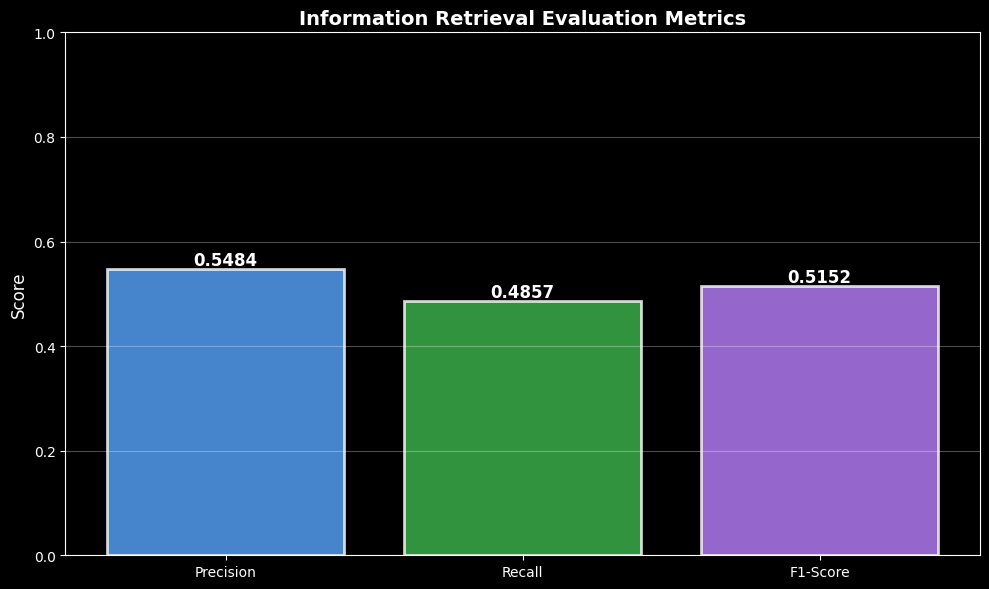

In [9]:
def calculate_ir_metrics(text1, text2):
    """Calculate IR evaluation metrics."""
    words1 = set(preprocess_text(text1).split())
    words2 = set(preprocess_text(text2).split())
    
    # Treating text2 as retrieved and text1 as relevant
    true_positives = len(words1.intersection(words2))
    
    precision = true_positives / len(words2) if words2 else 0.0
    recall = true_positives / len(words1) if words1 else 0.0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0
    
    return precision, recall, f1_score

precision, recall, f1 = calculate_ir_metrics(doc1, doc2)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Visualize metrics
fig, ax = plt.subplots(figsize=(10, 6))
metrics = ['Precision', 'Recall', 'F1-Score']
values = [precision, recall, f1]
colors = ['#58a6ff', '#3fb950', '#bb80ff']

bars = ax.bar(metrics, values, color=colors, alpha=0.8, edgecolor='white', linewidth=2)
ax.set_ylim(0, 1)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Information Retrieval Evaluation Metrics', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars, values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{value:.4f}',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

## 6. Comprehensive Similarity Comparison

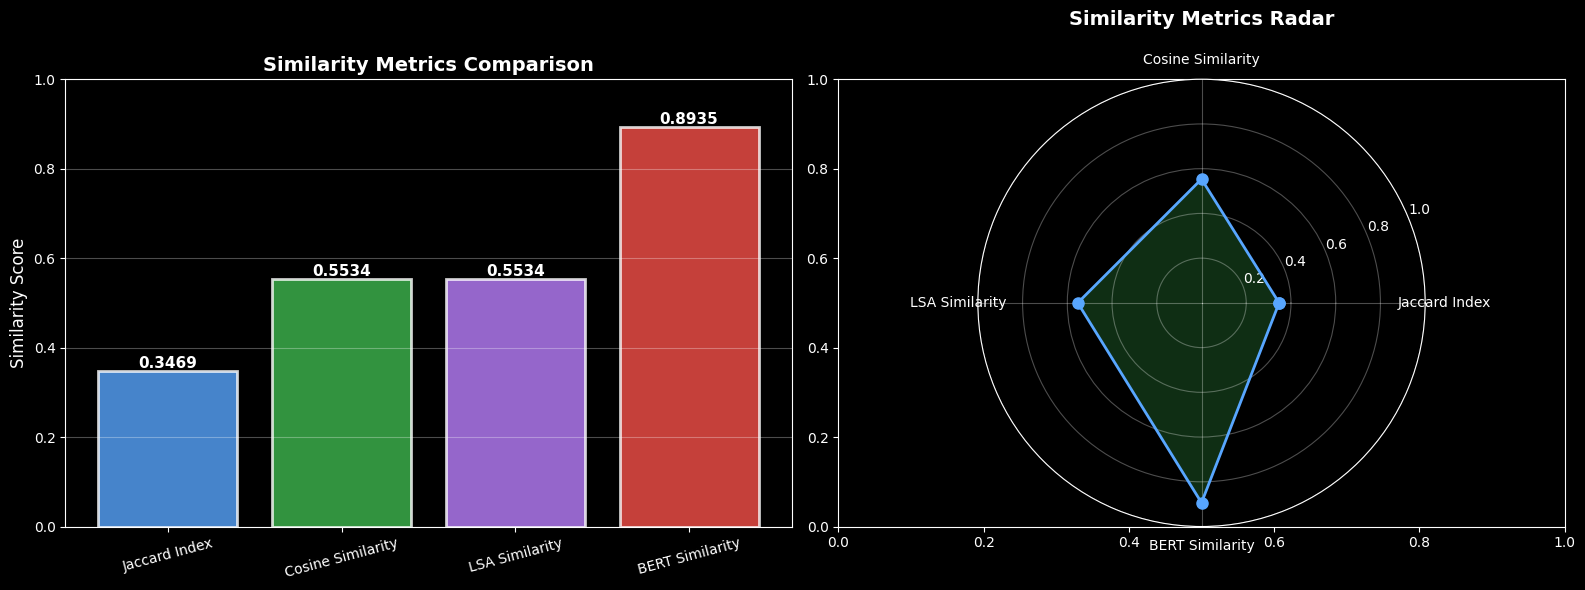


SIMILARITY ANALYSIS SUMMARY
Jaccard Index       : 0.3469
Cosine Similarity   : 0.5534
LSA Similarity      : 0.5534
BERT Similarity     : 0.8935

Average Similarity  : 0.5868


In [10]:
# Create comprehensive comparison
results = {
    'Jaccard Index': jaccard_score,
    'Cosine Similarity': cosine_sim,
    'LSA Similarity': lsa_sim,
    'BERT Similarity': bert_sim
}

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart
methods = list(results.keys())
scores = list(results.values())
colors_chart = ['#58a6ff', '#3fb950', '#bb80ff', '#f85149']

bars = ax1.bar(methods, scores, color=colors_chart, alpha=0.8, edgecolor='white', linewidth=2)
ax1.set_ylim(0, 1)
ax1.set_ylabel('Similarity Score', fontsize=12)
ax1.set_title('Similarity Metrics Comparison', fontsize=14, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)
ax1.tick_params(axis='x', rotation=15)

for bar, score in zip(bars, scores):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{score:.4f}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

# Radar chart
angles = np.linspace(0, 2 * np.pi, len(methods), endpoint=False).tolist()
scores_radar = scores + [scores[0]]  # Complete the circle
angles += angles[:1]

ax2 = plt.subplot(122, projection='polar')
ax2.plot(angles, scores_radar, 'o-', linewidth=2, color='#58a6ff', markersize=8)
ax2.fill(angles, scores_radar, alpha=0.25, color='#3fb950')
ax2.set_xticks(angles[:-1])
ax2.set_xticklabels(methods, fontsize=10)
ax2.set_ylim(0, 1)
ax2.set_title('Similarity Metrics Radar', fontsize=14, fontweight='bold', pad=20)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary
print("\n" + "="*60)
print("SIMILARITY ANALYSIS SUMMARY")
print("="*60)
for method, score in results.items():
    print(f"{method:20s}: {score:.4f}")
print(f"\n{'Average Similarity':20s}: {np.mean(scores):.4f}")
print("="*60)

## 7. Embedding Visualization with Collapsible Summary

Display all embeddings in an organized, collapsible format for detailed analysis.

In [11]:
def create_comprehensive_embedding_display():
    """Create a comprehensive collapsible display of all embeddings."""
    
    html = """
    <div style="background: #0d1117; padding: 20px; border-radius: 12px; 
                border: 2px solid #30363d; margin: 20px 0;">
        <h2 style="color: #58a6ff; text-align: center; margin-bottom: 20px;">
            📊 Complete Embedding Analysis Dashboard
        </h2>
    """
    
    # TF-IDF Section
    html += """
    <div style="background: #161b22; border: 1px solid #30363d; 
                border-radius: 8px; padding: 16px; margin: 16px 0;">
        <h3 style="color: #3fb950; margin-bottom: 16px;">🔤 TF-IDF Vectors</h3>
    """
    html += create_collapsible_vector_display(tfidf_doc1, "Document 1 TF-IDF", feature_names)
    html += create_collapsible_vector_display(tfidf_doc2, "Document 2 TF-IDF", feature_names)
    html += f"""
        <div style="margin-top: 16px; padding: 12px; background: #0d1117; 
                    border-radius: 6px; border-left: 4px solid #3fb950;">
            <strong style="color: #e6edf3;">Cosine Similarity:</strong> 
            <span style="color: #58a6ff; font-size: 20px; font-weight: bold;">{cosine_sim:.4f}</span>
        </div>
    </div>
    """
    
    # LSA Section
    html += """
    <div style="background: #161b22; border: 1px solid #30363d; 
                border-radius: 8px; padding: 16px; margin: 16px 0;">
        <h3 style="color: #bb80ff; margin-bottom: 16px;">🔍 LSA Vectors (Dimensionality Reduced)</h3>
    """
    html += create_collapsible_vector_display(lsa_doc1, "Document 1 LSA")
    html += create_collapsible_vector_display(lsa_doc2, "Document 2 LSA")
    html += f"""
        <div style="margin-top: 16px; padding: 12px; background: #0d1117; 
                    border-radius: 6px; border-left: 4px solid #bb80ff;">
            <strong style="color: #e6edf3;">LSA Similarity:</strong> 
            <span style="color: #58a6ff; font-size: 20px; font-weight: bold;">{lsa_sim:.4f}</span>
            <br>
            <span style="color: #8b949e; font-size: 14px;">
                Reduced from {tfidf_matrix.shape[1]} to {n_components} dimensions
            </span>
        </div>
    </div>
    """
    
    # BERT Section
    html += """
    <div style="background: #161b22; border: 1px solid #30363d; 
                border-radius: 8px; padding: 16px; margin: 16px 0;">
        <h3 style="color: #f85149; margin-bottom: 16px;">🤖 BERT Embeddings (Contextual)</h3>
    """
    html += create_collapsible_vector_display(bert_emb1, "Document 1 BERT")
    html += create_collapsible_vector_display(bert_emb2, "Document 2 BERT")
    html += f"""
        <div style="margin-top: 16px; padding: 12px; background: #0d1117; 
                    border-radius: 6px; border-left: 4px solid #f85149;">
            <strong style="color: #e6edf3;">BERT Similarity:</strong> 
            <span style="color: #58a6ff; font-size: 20px; font-weight: bold;">{bert_sim:.4f}</span>
            <br>
            <span style="color: #8b949e; font-size: 14px;">
                {len(bert_emb1)}-dimensional contextual embeddings
            </span>
        </div>
    </div>
    """
    
    html += "</div>"
    return html

# Display comprehensive dashboard
display(HTML(create_comprehensive_embedding_display()))

Feature,TF-IDF Score,Weight
and,0.4084,
of,0.2870,
learning,0.2723,
machine,0.2042,
to,0.2042,
the,0.1913,
information,0.1913,
sample,0.1361,
intelligence,0.1361,
document,0.1361,


## 8. Conclusion

This notebook demonstrated various document similarity techniques:

### Key Takeaways:
- **Jaccard Index**: Simple set-based measure, good for exact word matches
- **Cosine Similarity (TF-IDF)**: Considers word importance and frequency
- **LSA**: Captures latent semantic relationships through dimensionality reduction
- **BERT**: State-of-the-art contextual understanding using deep learning

### Use Cases:
- **Plagiarism Detection**: High similarity scores indicate potential copying
- **Document Clustering**: Group similar documents together
- **Search Engines**: Rank documents by relevance to queries
- **Recommendation Systems**: Suggest similar content to users

All embeddings are displayed in collapsible format for detailed analysis while maintaining a clean interface.